In [58]:
#dans cette case ci, nous importons toutes les librairies nécessaires pour l'objectif visé notamment l'analyse exploratoire et le
#préprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#importation du jeu de donnée
df = pd.read_csv("Vente.csv", delimiter='\t')

In [12]:
#Affichage des cinq premières et dernières lignes du jeu de donnée
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [13]:
df.shape

(2240, 29)

In [14]:
df.columns.to_series().groupby(df.dtypes).count()

int64      25
float64     1
object      3
dtype: int64

In [27]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [28]:
df.count()

ID                     2240
Year_Birth             2240
Education              2240
Marital_Status         2240
Income                 2216
Kidhome                2240
Teenhome               2240
Dt_Customer            2240
Recency                2240
MntWines               2240
MntFruits              2240
MntMeatProducts        2240
MntFishProducts        2240
MntSweetProducts       2240
MntGoldProds           2240
NumDealsPurchases      2240
NumWebPurchases        2240
NumCatalogPurchases    2240
NumStorePurchases      2240
NumWebVisitsMonth      2240
AcceptedCmp3           2240
AcceptedCmp4           2240
AcceptedCmp5           2240
AcceptedCmp1           2240
AcceptedCmp2           2240
Complain               2240
Z_CostContact          2240
Z_Revenue              2240
Response               2240
dtype: int64

In [23]:
for col in df.select_dtypes(object):
#     print(col)
    print(df[col].value_counts())
    print("============="*18)

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
31-08-2012    12
12-05-2014    11
12-09-2012    11
14-02-2013    11
22-05-2014    10
              ..
09-01-2014     1
30-05-2014     1
11-10-2012     1
23-08-2012     1
08-02-2014     1
Name: Dt_Customer, Length: 663, dtype: int64


In [19]:
# identification des valeures manquantes
#soit la colonne révenu presente 24 données manquantes
df.columns.to_series().groupby(df.isna().sum()).groups

{0: ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'], 24: ['Income']}

In [ ]:
# age maximum est de 2021 - 1893 soit 128 ans et age minimum est de 2021 - 1996 soit 25 ans
#nous allons donc segmenter les individus de la sorte 

In [25]:
df['Year_Birth'].max()

1996

In [26]:
df['Year_Birth'].min()

1893

In [53]:
# les catégoriser dans une classe notamment 
df['age_réel']=-df["Year_Birth"]+2021
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,age_réel
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,< 25 ans,64
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,< 25 ans,67
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,> 60 ans,56
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,> 60 ans,37
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,> 60 ans,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,> 60 ans,54
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,< 25 ans,75
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,> 60 ans,40
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,< 25 ans,65


In [54]:
def age(l):
    if l<=25:
        message='< 25 ans'
    if 25<l<=35:
        message='25 - 35 ans'
    if 35<l<=60:
        message='35 - 60 ans'
    if l>=60:
        message='> 60 ans'
    return message

In [56]:
df['age']=df["age_réel"].map(age)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,age_réel
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,> 60 ans,64
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,> 60 ans,67
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,35 - 60 ans,56
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,35 - 60 ans,37
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,35 - 60 ans,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,35 - 60 ans,54
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,> 60 ans,75
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,35 - 60 ans,40
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,> 60 ans,65


In [57]:
for col in df.select_dtypes(object):
#     print(col)
    print(df[col].value_counts())
    print("============="*18)

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
31-08-2012    12
12-05-2014    11
12-09-2012    11
14-02-2013    11
22-05-2014    10
              ..
09-01-2014     1
30-05-2014     1
11-10-2012     1
23-08-2012     1
08-02-2014     1
Name: Dt_Customer, Length: 663, dtype: int64
35 - 60 ans    1396
> 60 ans        655
25 - 35 ans     187
< 25 ans          2
Name: age, dtype: int64


In [60]:
df.count()

ID                     2240
Year_Birth             2240
Education              2240
Marital_Status         2240
Income                 2216
Kidhome                2240
Teenhome               2240
Dt_Customer            2240
Recency                2240
MntWines               2240
MntFruits              2240
MntMeatProducts        2240
MntFishProducts        2240
MntSweetProducts       2240
MntGoldProds           2240
NumDealsPurchases      2240
NumWebPurchases        2240
NumCatalogPurchases    2240
NumStorePurchases      2240
NumWebVisitsMonth      2240
AcceptedCmp3           2240
AcceptedCmp4           2240
AcceptedCmp5           2240
AcceptedCmp1           2240
AcceptedCmp2           2240
Complain               2240
Z_CostContact          2240
Z_Revenue              2240
Response               2240
age                    2240
age_réel               2240
dtype: int64

In [62]:
df['NumStorePurchases']

0        4
1        2
2       10
3        4
4        6
        ..
2235     4
2236     5
2237    13
2238    10
2239     4
Name: NumStorePurchases, Length: 2240, dtype: int64

In [66]:
df_groupé = df.groupby('age').sum()[['NumStorePurchases','NumWebPurchases', 'NumCatalogPurchases']]
df_groupé

,NumStorePurchases,NumWebPurchases,NumCatalogPurchases
age,,,
25 - 35 ans,1051,646,513
35 - 60 ans,7713,5529,3321
< 25 ans,5,4,1
> 60 ans,4201,2971,2128


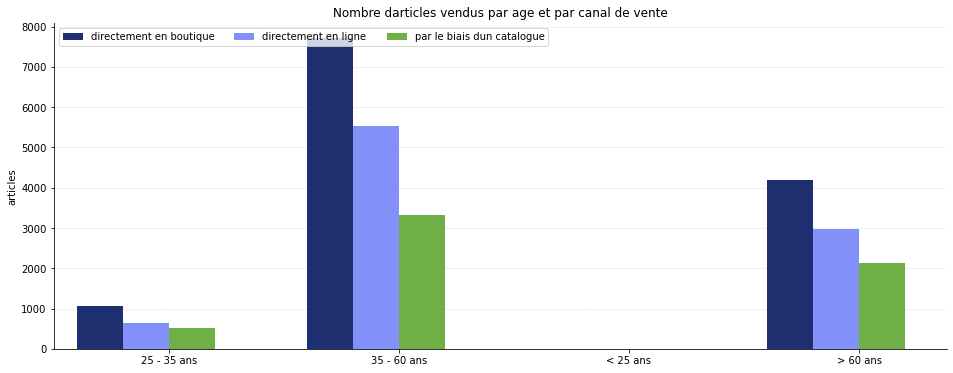

In [83]:
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_groupé.index))
# plot bars
plt.bar(x - 0.3, df_groupé['NumStorePurchases'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_groupé['NumWebPurchases'], width = 0.2, color = '#8390FA')
plt.bar(x + 0.1, df_groupé['NumCatalogPurchases'], width = 0.2, color = '#6EAF46')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('articles')
plt.xticks(x, df_groupé.index)
plt.xlim(-0.5, )
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Nombre darticles vendus par age et par canal de vente', loc ='center')
plt.legend(['directement en boutique', 'directement en ligne', 'par le biais dun catalogue'], loc='upper left', ncol = 4)
plt.show()

In [90]:
df_groupé2 = df.groupby('Education').sum()[['NumStorePurchases','NumWebPurchases', 'NumCatalogPurchases']]
df_groupé2

,NumStorePurchases,NumWebPurchases,NumCatalogPurchases
Education,,,
2n Cycle,1118,757,471
Basic,154,102,26
Graduation,6570,4649,3072
Master,2182,1492,951
PhD,2946,2150,1443


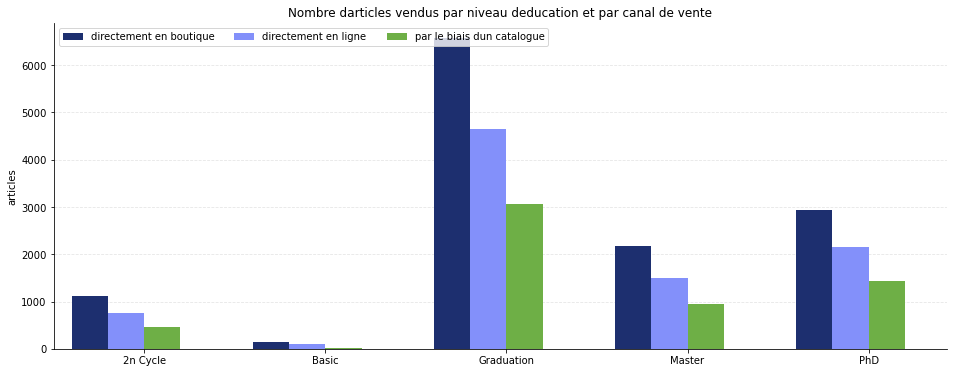

In [91]:
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_groupé2.index))
# plot bars
plt.bar(x - 0.3, df_groupé2['NumStorePurchases'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_groupé2['NumWebPurchases'], width = 0.2, color = '#8390FA')
plt.bar(x + 0.1, df_groupé2['NumCatalogPurchases'], width = 0.2, color = '#6EAF46')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('articles')
plt.xticks(x, df_groupé2.index)
plt.xlim(-0.5, )
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Nombre darticles vendus par niveau deducation et par canal de vente', loc ='center')
plt.legend(['directement en boutique', 'directement en ligne', 'par le biais dun catalogue'], loc='upper left', ncol = 4)
plt.show()

In [92]:
df_groupé3 = df.groupby('Marital_Status').sum()[['NumStorePurchases','NumWebPurchases', 'NumCatalogPurchases']]
df_groupé3

,NumStorePurchases,NumWebPurchases,NumCatalogPurchases
Marital_Status,,,
Absurd,13,7,15
Alone,12,15,2
Divorced,1350,1000,620
Married,5055,3532,2268
Single,2707,1859,1248
Together,3327,2367,1552
Widow,494,356,256
YOLO,12,14,2


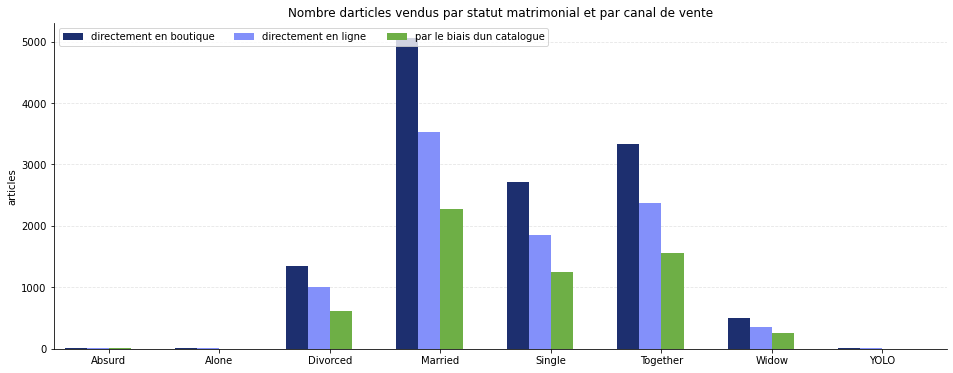

In [93]:
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_groupé3.index))
# plot bars
plt.bar(x - 0.3, df_groupé3['NumStorePurchases'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_groupé3['NumWebPurchases'], width = 0.2, color = '#8390FA')
plt.bar(x + 0.1, df_groupé3['NumCatalogPurchases'], width = 0.2, color = '#6EAF46')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('articles')
plt.xticks(x, df_groupé3.index)
plt.xlim(-0.5, )
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Nombre darticles vendus par statut matrimonial et par canal de vente', loc ='center')
plt.legend(['directement en boutique', 'directement en ligne', 'par le biais dun catalogue'], loc='upper left', ncol = 4)
plt.show()